In [25]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob as tb
from wordcloud import WordCloud, STOPWORDS

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from googletrans import Translator

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('data.csv', encoding='latin-1')

slang = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
slang = slang.rename(columns={0: 'original', 1:'replacement'})

stopword_id = pd.read_csv('stopwords-id.csv', encoding='latin-1', header=None)
stopword_id = stopword_id.rename(columns={0: 'stopword'})

In [3]:
print("Shape: ", df.shape)
print("---------")
print("Head: ", df.head)

Shape:  (13169, 13)
---------
Head:  <bound method NDFrame.head of                                                    Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS

In [17]:
df[['Tweet', 'HS']]

,Tweet,HS
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13165,USER Kasur mana enak kunyuk',0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13167,USER USER USER USER Bom yang real mudah terdet...,0


In [4]:
print("Toxic Shape: ", df[(df['HS'] == 1) | (df["Abusive"] == 1)].shape)
print("Non Toxic Shape: ", df[(df['HS'] == 0) & (df["Abusive"] == 0)].shape)

Toxic Shape:  (7309, 13)
Non Toxic Shape:  (5860, 13)


In [5]:
print("Shape: ", slang.shape)
slang.head()

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [6]:
print("Shape: ", stopword_id.shape)
stopword_id.head()

Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [7]:
factory = StemmerFactory()
stemmer =factory.create_stemmer()

In [8]:
def lowercase(text):
    return text.lower()

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = str(text).replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('\n',"").replace('\ud83d',"").replace('\ude4f',"").replace('\ud83e',"").replace('\udd23',"").replace('\ude2d',"").replace('\udc40',"")
    
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub(r'^rt[\s]+', '', text)
    
    #remove username
    text = re.sub('user',' ',text)
    
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")



alay_dict_map = dict(zip(slang['original'], slang['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopword_id.stopword.values else word for word in text.split(' ')])
    return text

#remove number
def remove_number(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

#Remove Punctuation
def remove_punctuation(text):
    text = text.translate(str.maketrans("","",string.punctuation))
    return text

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    text = text.strip()
    return text

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    text =  re.sub('\s+',' ',text)
    return text


# remove single char
def remove_single_char(text):
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    return text



In [9]:
def preprocess(text): 
    text = lowercase(text)
    text = remove_tweet_special(text)
    text = normalize_alay(text)
    text = remove_stopword(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace_LT(text)
    text = remove_whitespace_multiple(text)
    text = remove_single_char(text)
    return text

In [10]:
df['Preprocessing'] = df['Tweet'].apply(preprocess)

In [11]:
print("Shape: ", df.shape)
print("---------")
print("Head: ", df.head)

Shape:  (13169, 14)
---------
Head:  <bound method NDFrame.head of                                                    Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS

In [22]:
df[['Tweet', 'Preprocessing']]

,Tweet,Preprocessing
0,- disaat semua cowok berusaha melacak perhatia...,cowok berusaha melacak perhatian gue lantas re...
1,RT USER: USER siapa yang telat ngasih tau elu?...,telat tau elu edan sarap gue bergaul cigax jif...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang berfikir percaya tuhan jatuh berkali...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,ku tau matamu sipit aku
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir dongoknya dungu hahahah
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,berbicara ndasmu congor sekata anjyng
13165,USER Kasur mana enak kunyuk',kasur enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu bosan duh xf0x9fx98xaa
13167,USER USER USER USER Bom yang real mudah terdet...,bom real mudah terdeteksi bom terkubur dahsyat...


In [23]:
df.to_csv("Hasil_Preprocesing.csv")

In [27]:
text=' '.join(tweet for tweet in df['Preprocessing'])

(-0.5, 599.5, 299.5, -0.5)

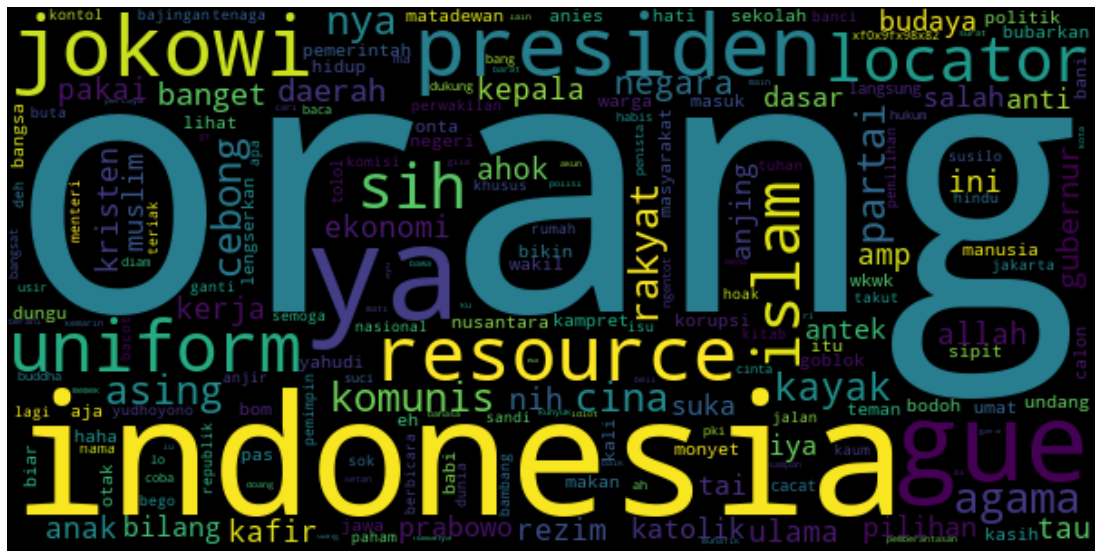

In [28]:
WordCloud = WordCloud(width = 600, height = 300, random_state = 21, max_font_size = 200, collocations = False).generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(WordCloud, Interpolation = 'bilinear')
plt.axis('off')

In [29]:
pip install -U setuptools

  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0.post20200210
    Uninstalling setuptools-45.2.0.post20200210:
      Successfully uninstalled setuptools-45.2.0.post20200210
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install flasgger

Note: you may need to restart the kernel to use updated packages.
